In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [15]:
# Generate data
np.random.seed(40)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)
x = []
for i in range(0,100):
    x.append([x1[i],x2[i],x3[i]])
    
x = np.array(x)
delta = np.random.rand(100)
eq = "y = 3*x1 + 7*x2 + 11*x3 + 8"
y = 3 * x1 + 7 * x2 + 11 * x3 + 8 + delta

print(x.shape)
print(y.shape)

# Plot data
"""plt.figure(figsize = (10, 5))
plt.plot(x,y, 'b.')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.title("X vs Y")
plt.show()"""


(100, 3)
(100,)


'plt.figure(figsize = (10, 5))\nplt.plot(x,y, \'b.\')\nplt.xlabel("Values of x")\nplt.ylabel("Values of y")\nplt.title("X vs Y")\nplt.show()'

In [3]:
# Loss function
def loss(y, y_predicted):
    return np.mean(np.square(y-y_predicted))

In [4]:
def get_grad(x_data, y_data, w, c):
#     print(x_data.shape)
#     print(y_data.shape)
#     j = (w[0]*x_data+w[1]*x_data+w[2]*x_data+c)
#     print(j.shape)
#     print((y_data - (w[0]*x_data+w[1]*x_data+w[2]*x_data+c)))
#     print(x_data.shape[0])
    w1_grad = []
    w2_grad = []
    w3_grad = []
    c_grad = []
#     print("w before")
#     print(w)
#     print("w1_grad before")
#     print(w1_grad)
    for i in range (0,x_data.shape[0]):
        w1_grad.append(((y_data[i] - (w[0]*x_data[i][0]+w[1]*x_data[i][1]+w[2]*x_data[i][2]+c))*(-x_data[i][0])))
        w2_grad.append(((y_data[i] - (w[0]*x_data[i][0]+w[1]*x_data[i][1]+w[2]*x_data[i][2]+c))*(-x_data[i][1])))
        w3_grad.append(((y_data[i] - (w[0]*x_data[i][0]+w[1]*x_data[i][1]+w[2]*x_data[i][2]+c))*(-x_data[i][2])))
        c_grad.append(((y_data - (w[0]*x_data[i][0]+w[1]*x_data[i][1]+w[2]*x_data[i][2]+c))*(-1)))
    
    w1 = np.mean(w1_grad)
    w2 = np.mean(w2_grad)
    w3 = np.mean(w3_grad)
    c_grad = np.mean(c_grad)
#     print("w after")
#     print(w)
#     print("w1_grad after")
#     print(w1_grad)
    return [w1, w2 , w3] , c_grad

In [5]:
indices = np.random.permutation(x.shape[0])
training_idx, val_idx, test_idx = indices[:60], indices[20:80], indices[80:100]

In [6]:
# Split x into training and testing data
x_train = x[training_idx]
x_val = x[val_idx]
x_test = x[test_idx]

# Split y into training and testing data
y_train = y[training_idx]
y_val = y[val_idx]
y_test = y[test_idx]

In [7]:
# Set random.seed value
def form_equation(lr,x_train,y_train,num_iter):
    np.random.seed(num_iter)

    # Initialize m and c values
    w1 = float(np.random.rand(1))
    w2 = float(np.random.rand(1))
    w3 = float(np.random.rand(1))
    c0 = float(np.random.rand(1))

    #print(w1,w2,w3)
    #print(c0)

    # Create empty lists to store intermediate w, c, loss functions
    w_vec = []; c_vec = []; loss_val_vec = []; loss_train_vec = []

    # NumberOfIterations
    NumberOfIterations = num_iter

    # Learning rate
    #print (x_train.shape)
    #print(y_train.shape)
    w = np.array([w1,w2,w3])
    lr = lr
    print("\nlr {:2.2f} num_iter {:2.2f}".format(lr,num_iter))
    for i in range(0, num_iter):
        w_grad, c_grad = get_grad(x_train, y_train, w, c0)
        w1 = w1 - lr * w_grad[0]
        w2 = w2 - lr * w_grad[1]
        w3 = w3 - lr * w_grad[2]
        c0 = c0 - lr * c_grad
        w = np.array([w1,w2,w3])
    #     loss_train = loss(y_train, (w1*x_train[0]+w2*x_train[1]+w3*x_train[2]+c0)) 
#         loss_val = loss(y_val, (w1*x_val[0]+w2*x_val[1]+w3*x_val[2]+c0)) 
        #print(w1,w2,w3)
    #     w_vec.append([w1,w2,w3])
    #     c_vec.append(c0)
    #     loss_val_vec.append(loss_val)
    #     loss_train_vec.append(loss_train)

    #print("Final w and c values are w_final = {:2.2f},{:2.2f},{:2.2f}, c_final = {:2.2f}".format(w[0],w[1],w[2],c))
    print("[{:2.2f} , {:2.2f} , {:2.2f} , {:2.2f}] \n".format(w[0],w[1],w[2],c0))  
    return w,c0
    #print("Hence the equation is of the form \ny = {:2.2f}*x1 + {:2.2f}*x1 + {:2.2f}*x1 + {:2.2f} ".format(w[0],w[1],w[2],c))

In [8]:
print("Original equation \n"+eq)
x = np.arange(0.1, 1.0, 0.2)
num_iter = [500,700,1000]
for lr in x:
    for ni in num_iter:
        w,c = form_equation(lr,x_train,y_train,ni)

Original equation 
y = 3*x1 + 7*x2 + 11*x3 + 8

lr 0.10 num_iter 500.00
[2.84 , 7.02 , 10.81 , 8.66] 


lr 0.10 num_iter 700.00
[2.84 , 7.06 , 11.03 , 8.53] 


lr 0.10 num_iter 1000.00
[2.86 , 7.09 , 11.14 , 8.44] 


lr 0.30 num_iter 500.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.30 num_iter 700.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.30 num_iter 1000.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.50 num_iter 500.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.50 num_iter 700.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.50 num_iter 1000.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.70 num_iter 500.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.70 num_iter 700.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.70 num_iter 1000.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.90 num_iter 500.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.90 num_iter 700.00
[2.87 , 7.10 , 11.17 , 8.42] 


lr 0.90 num_iter 1000.00
[2.87 , 7.10 , 11.17 , 8.42] 



In [9]:
#c = c0
y_pred = []
for i in range(0,x_test.shape[0]):
    y_pred.append(w[0]*x_test[i][0]+w[1]*x_test[i][1]+w[2]*x_test[i][2]+c)

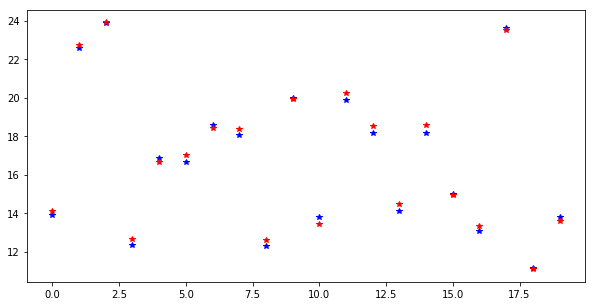

In [10]:
plt.figure(figsize=(10,5))
#plt.plot(x_test, y_test, "b.")
plt.plot(y_test,'*', color = 'b')
plt.plot(y_pred,'*', color = 'r')